In [1]:
import os
import sys
import numpy as np
import h5py

def load_h5(h5_filename):
    f = h5py.File(h5_filename)
    data = f['data'][:]
    label = f['label'][:]
    return data, label

In [17]:
labels = ['airplane',
        'bathtub',
        'bed',
        'bench',
        'bookshelf',
        'bottle',
        'bowl',
        'car',
        'chair',
        'cone',
        'cup',
        'curtain',
        'desk',
        'door',
        'dresser',
        'flower_pot',
        'glass_box',
        'guitar',
        'keyboard',
        'lamp',
        'laptop',
        'mantel',
        'monitor',
        'night_stand',
        'person',
        'piano',
        'plant',
        'radio',
        'range_hood',
        'sink',
        'sofa',
        'stairs',
        'stool',
        'table',
        'tent',
        'toilet',
        'tv_stand',
        'vase',
        'wardrobe',
        'xbox']
a = 'xbox'
print labels.index(a)

data, label = load_h5('/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_test0.h5')
data1 = np.array([data[1,:,:]])
data2 = np.array([data[2,:,:]])
data = np.vstack ((data1,data2))
print np.shape(data)
print data[1,12]
print data[1,13]
op1 = np.sqrt(np.sum(np.square(data[1,12] - data[1,13])))
op2 = np.linalg.norm(data[1,12] - data[1,13])
print op1
print op2

39
(2, 2048, 3)
[ 0.04556094  0.02239046 -0.58550334]
[-0.44697666  0.01494128  0.8944208 ]
1.5597514
1.5597514


In [56]:
pointcloud1 = data[1,:,:]
pointcloud2 = data[1,:,:]
pointcloud = np.array([pointcloud1,pointcloud2])

def real_data_for_discriminator(data_dir, label_name):
    data, label = load_h5(data_dir)
    pointcloud = np.array([data[0]])
    for m in range (0,np.size(label,0)):
        if label[m,0] == lables.index(label_name):
            pointcloud_single = np.array([data[m]])
            pointcloud = np.vstack((pointcloud,pointcloud_single))
    return pointcloud[1:]

data_dir = '/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_test0.h5'
pointcloud9 = real_data_for_discriminator(data_dir, 'airplane')
print np.shape(pointcloud9)

(79, 2048, 3)


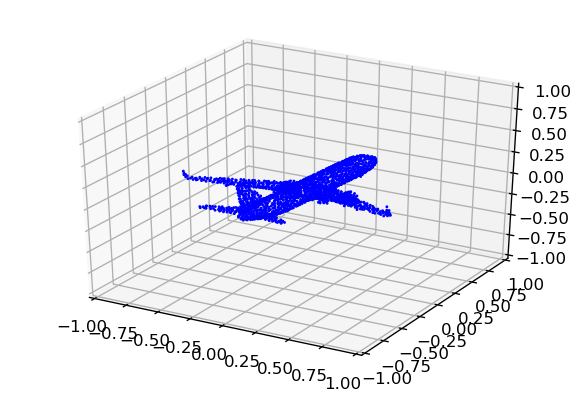

In [12]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline
pointcloud = data[1,:,:]

def pointcloud_rotate_z(pointcloud, theta):
    R = np.array([[math.cos(theta),math.sin(theta),0],[-math.sin(theta),math.cos(theta),0],[0,0,1]])
    pointcloud2 = np.dot(pointcloud, R)
    return pointcloud2

def pointcloud_rotate_x(pointcloud, theta):
    R = np.array([[1,0,0],[0,math.cos(theta),math.sin(theta)],[0,-math.sin(theta),math.cos(theta)]])
    pointcloud2 = np.dot(pointcloud, R)
    return pointcloud2

fig=plt.figure(dpi=120)
ax=fig.add_subplot(111,projection='3d')

theta = 1.5

pointcloud2 = pointcloud_rotate_x(pointcloud, theta)
x = pointcloud2[:,0]
y = pointcloud2[:,1]
z = pointcloud2[:,2]
ax.cla()
ax.scatter(x,y,z,c='b',marker='.',s=2,linewidth=1,alpha=1,cmap='spectral')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

In [13]:
print np.size(pointcloud2,0)

2048


In [19]:
delta = 0.05
lim_low_x = -1
lim_high_x = lim_low_x + delta
lim_low_y = -1
lim_high_y = lim_low_y + delta
pointcloud2_x = pointcloud2[:,0]
pointcloud2_y = pointcloud2[:,1]
pointcloud_oneside = [0,0,0]

while (lim_high_y <= 1):
    while (lim_high_x <= 1):
        pos_x=np.where(((pointcloud2_x>=lim_low_x) & (pointcloud2_x<lim_high_x)))
        pos_y=np.where(((pointcloud2_y>=lim_low_y) & (pointcloud2_y<lim_high_y)))
        pos = [val for val in pos_x[0] if val in pos_y[0]]
        pointcloud_select = pointcloud2[pos,:]    
        if (np.shape(pointcloud_select)[0]>0):
            point_oneside = pointcloud_select[np.where(pointcloud_select == np.min(pointcloud_select[:,2]))[0][0],:]
            pointcloud_oneside = np.vstack((pointcloud_oneside,point_oneside))
        lim_low_x = lim_low_x+delta
        lim_high_x = lim_high_x+delta
    lim_low_y = lim_low_y+delta
    lim_high_y = lim_high_y+delta
    lim_low_x = -1
    lim_high_x = lim_low_x + delta

pointcloud_oneside = pointcloud_oneside[1:,:]
print np.size(pointcloud_oneside,0)

284


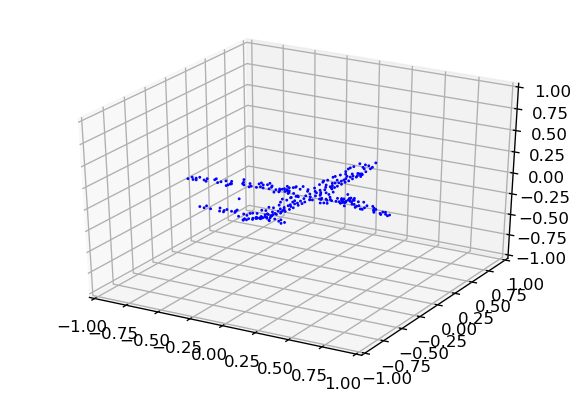

In [20]:
fig=plt.figure(dpi=120)
ax=fig.add_subplot(111,projection='3d')

x = pointcloud_oneside[:,0]
y = pointcloud_oneside[:,1]
z = pointcloud_oneside[:,2]
ax.cla()
ax.scatter(x,y,z,c='b',marker='.',s=2,linewidth=1,alpha=1,cmap='spectral')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

In [21]:
filename = "/home/wuhang/tensorwork/pointgan/data/"+"/side_train"+".csv"
print filename
np.savetxt(filename, pointcloud_oneside, delimiter = ',')

/home/wuhang/tensorwork/pointgan/data//side_train.csv


In [ ]:
def tans_data_for_pcl(num,label_name):
    data0, label0 = load_h5('/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_train0.h5')
    data1, label1 = load_h5('/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_train1.h5')
    data2, label2 = load_h5('/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_train2.h5')
    data3, label3 = load_h5('/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_train3.h5')
    data4, label4 = load_h5('/home/wuhang/tensorwork/pointgan/data/modelnet40_ply_hdf5_2048/ply_data_train4.h5')
    i = 0
    for m in range (0,np.size(label0,0)):
        if label0[m,0] == num:
            filename = "/home/wuhang/tensorwork/pointgan/data/"+label_name+"/train"+str(i)+".csv"
            print filename
            data_one = data0[m]
            np.savetxt(filename, data_one, delimiter = ',')
            i = i+1
    for m in range (0,np.size(label1,0)):
        if label1[m,0] == num:
            filename = "/home/wuhang/tensorwork/pointgan/data/"+label_name+"/train"+str(i)+".csv"
            print filename
            data_one = data1[m]
            np.savetxt(filename, data_one, delimiter = ',')
            i = i+1
    for m in range (0,np.size(label2,0)):
        if label2[m,0] == num:
            filename = "/home/wuhang/tensorwork/pointgan/data/"+label_name+"/train"+str(i)+".csv"
            print filename
            data_one = data2[m]
            np.savetxt(filename, data_one, delimiter = ',')
            i = i+1
    for m in range (0,np.size(label3,0)):
        if label3[m,0] == num:
            filename = "/home/wuhang/tensorwork/pointgan/data/"+label_name+"/train"+str(i)+".csv"
            print filename
            data_one = data3[m]
            np.savetxt(filename, data_one, delimiter = ',')
            i = i+1
    for m in range (0,np.size(label4,0)):
        if label4[m,0] == num:
            filename = "/home/wuhang/tensorwork/pointgan/data/"+label_name+"/train"+str(i)+".csv"
            print filename
            data_one = data4[m]
            np.savetxt(filename, data_one, delimiter = ',')
            i = i+1

In [18]:
arr = np.arange(6).reshape((2,3))
print arr
print arr.T

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]
